In [1]:
import math
import os
import glob
import json
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread

In [2]:
bnr_train_dir = './BnR_train_list.txt'
bnr_valid_dir = './BnR_val_list.txt'

In [3]:
bnr_list = []
with open(bnr_train_dir, 'r') as f:
    for text in f:
        bnr_list.append(os.path.splitext(text.strip())[0])

In [4]:
bnr_val_list = []
with open(bnr_valid_dir, 'r') as f:
    for text in f:
        bnr_val_list.append(os.path.splitext(text.strip())[0])

In [91]:
bnr_list

['BLD01139_PS3_K3A_NIA0277',
 'BLD00709_PS3_K3A_NIA0277',
 'BLD02070_PS3_K3A_NIA0374',
 'BLD00157_PS3_K3A_NIA0276',
 'BLD00180_PS3_K3A_NIA0276',
 'BLD03368_PS3_K3A_NIA0376',
 'BLD02379_PS3_K3A_NIA0374',
 'BLD01188_PS3_K3A_NIA0373',
 'BLD01252_PS3_K3A_NIA0373',
 'BLD02650_PS3_K3A_NIA0375',
 'BLD00798_PS3_K3A_NIA0277',
 'BLD01124_PS3_K3A_NIA0277',
 'BLD02060_PS3_K3A_NIA0374',
 'BLD02988_PS3_K3A_NIA0375',
 'BLD01063_PS3_K3A_NIA0277',
 'BLD01292_PS3_K3A_NIA0373',
 'BLD12006_PS3_K3A_NIA0391',
 'BLD03092_PS3_K3A_NIA0376',
 'BLD00924_PS3_K3A_NIA0277',
 'BLD03694_PS3_K3A_NIA0376',
 'BLD03363_PS3_K3A_NIA0376',
 'BLD01294_PS3_K3A_NIA0373',
 'BLD01761_PS3_K3A_NIA0373',
 'BLD00273_PS3_K3A_NIA0276',
 'BLD00121_PS3_K3A_NIA0276',
 'BLD02924_PS3_K3A_NIA0375',
 'BLD01602_PS3_K3A_NIA0373',
 'BLD00192_PS3_K3A_NIA0276',
 'BLD01708_PS3_K3A_NIA0373',
 'BLD01189_PS3_K3A_NIA0373',
 'BLD02874_PS3_K3A_NIA0375',
 'BLD01546_PS3_K3A_NIA0373',
 'BLD00334_PS3_K3A_NIA0276',
 'BLD02327_PS3_K3A_NIA0374',
 'BLD01447_PS3

In [82]:
for filename in bnr_list:
    !cp {'./building/train/raw/' + filename + '.png'} {'./mixed/train/raw/' + filename + '.png'}

In [5]:
len(bnr_list)

324

In [6]:
len(bnr_val_list)

30

In [8]:
for filename in bnr_val_list:
    !cp {'./building/val/raw/' + filename + '.png'} {'./mixed/val/raw/' + filename + '.png'}

cp: cannot stat './building/val/raw/BLD00209_PS3_K3A_NIA0276.png': No such file or directory
cp: cannot stat './building/val/raw/BLD00934_PS3_K3A_NIA0277.png': No such file or directory
cp: cannot stat './building/val/raw/BLD00980_PS3_K3A_NIA0277.png': No such file or directory
cp: cannot stat './building/val/raw/BLD00281_PS3_K3A_NIA0276.png': No such file or directory
cp: cannot stat './building/val/raw/BLD02544_PS3_K3A_NIA0375.png': No such file or directory
cp: cannot stat './building/val/raw/BLD00972_PS3_K3A_NIA0277.png': No such file or directory
cp: cannot stat './building/val/raw/BLD01861_PS3_K3A_NIA0374.png': No such file or directory
cp: cannot stat './building/val/raw/BLD00405_PS3_K3A_NIA0276.png': No such file or directory
cp: cannot stat './building/val/raw/BLD01758_PS3_K3A_NIA0373.png': No such file or directory
cp: cannot stat './building/val/raw/BLD02064_PS3_K3A_NIA0374.png': No such file or directory
cp: cannot stat './building/val/raw/BLD00605_PS3_K3A_NIA0277.png': No 

In [26]:
image_path = f'./building/train/raw/{temp}.png'
image_label_path = f'./building/train/label/{temp}.png'
building_json_path = f'./building/train/label/{temp}.json'
road_json_path = f'./roads/train/label/{temp}.json'

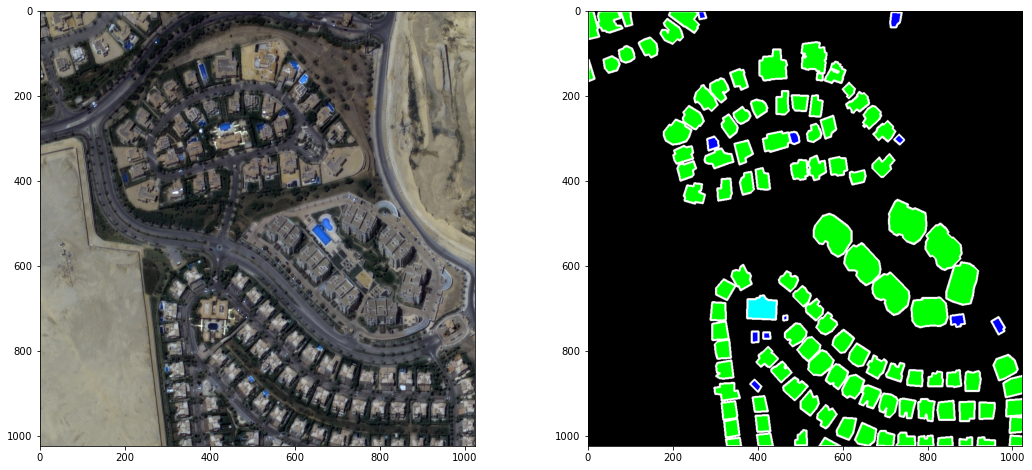

In [30]:
fig = plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
image = imread(image_path)
plt.imshow(image)
plt.subplot(1, 2, 2)
image_label = imread(image_label_path)
plt.imshow(image_label)

## Polygon 그리기

In [13]:
bg = np.zeros((1024, 1024, 3), np.uint8)

In [ ]:
for filename in bnr_list:
    image_path = f'./building/train/raw/{filename}.png'
    image_label_path = f'./building/train/label/{filename}.png'
    building_json_path = f'./building/train/label/{filename}.json'
    road_json_path = f'./roads/train/label/{filename}.json'

In [9]:
label_dict = {}

In [10]:
def parse_road_json(json_file):
    polygon_list = []
    label_list = []
    for feature in json_file['features']:
        if feature['properties']['road_imcoords']:
            polygon = list(map(float, feature['properties']['road_imcoords'].split(',')))
            polygon = list(map(math.floor, polygon))
            polygon = np.array(polygon, np.int32).reshape(-1, 1, 2)
            polygon_list.append(polygon)
        
            label = int(feature['properties']['type_id'])
            label_list.append(label)
        
            if label not in label_dict:
                label_dict[label] = feature['properties']['type_name']
    
    return polygon_list, label_list

In [11]:
def parse_building_json(json_file):
    polygon_list = []
    label_list = []
    for feature in json_file['features']:
        if feature['properties']['building_imcoords']:
            polygon = list(map(float, feature['properties']['building_imcoords'].split(',')))
            polygon = list(map(math.floor, polygon))
            polygon = np.array(polygon, np.int32).reshape(-1, 1, 2)
            polygon_list.append(polygon)
        
            label = int(feature['properties']['type_id'])
            label_list.append(label)
        
            if label not in label_dict:
                label_dict[label] = feature['properties']['type_name']
    
    return polygon_list, label_list

In [29]:
def show_label(image_path, label_path, building_polygon, road_polygon):
        fig = plt.figure(figsize=(18, 8))
        plt.subplot(1, 2, 1)
        # image = imread(image_path)
        image = np.zeros((1024, 1024, 3), np.uint8)
        # img = cv2.polylines(image, polygon_list, True, (255, 255, 255))
        image = cv2.fillPoly(image, road_polygon, (255, 0, 0))
        image = cv2.fillPoly(image, building_polygon, (0, 255, 0))
#         plt.imshow(image)
#         plt.subplot(1, 2, 2)
#         image_label = imread(label_path)
#         plt.imshow(image_label)
        
        return image

In [30]:
# savepath train / val 변경하여 저장
def save_image(img, filename):
    savepath = './mixed/val/label/'
    img = Image.fromarray(img)
    img.save(f'{savepath}{filename}.png')
    print(f'{savepath}{filename}.png saved!')

In [ ]:
for filename in bnr_list:
    image_path = f'./building/train/raw/{filename}.png'
    image_label_path = f'./building/train/label/{filename}.png'
    building_json_path = f'./building/train/label/{filename}.json'
    road_json_path = f'./roads/train/label/{filename}.json'
    if os.path.isfile(image_path) and os.path.isfile(image_label_path) and os.path.isfile(building_json_path) and os.path.isfile(road_json_path):
        with open(building_json_path) as fb, open(road_json_path) as fl:
            building_json_file = json.load(fb)
            road_json_file = json.load(fl)
            building_polygon, _ = parse_building_json(building_json_file)
            road_polygon, _ = parse_road_json(road_json_file)
            img = show_label(image_path, image_label_path, building_polygon, road_polygon)
            #draw_label(image_path, label_path, polygon_list)
            save_image(img, filename)
    else:
        print("filename Different!")

In [ ]:
for filename in bnr_val_list:
    image_label_path = f'./building/train/label/{filename}.png'
    building_json_path = f'./building/train/label/{filename}.json'
    road_json_path = f'./roads/train/label/{filename}.json'
    if os.path.isfile(image_label_path) and os.path.isfile(building_json_path) and os.path.isfile(road_json_path):
        with open(building_json_path) as fb, open(road_json_path) as fl:
            building_json_file = json.load(fb)
            road_json_file = json.load(fl)
            building_polygon, _ = parse_building_json(building_json_file)
            road_polygon, _ = parse_road_json(road_json_file)
            img = show_label(None, image_label_path, building_polygon, road_polygon)
            #draw_label(image_path, label_path, polygon_list)
            save_image(img, filename)
    else:
        print("filename Different!")
        
    image_label_path = f'./building/val/label/{filename}.png'
    building_json_path = f'./building/val/label/{filename}.json'
    road_json_path = f'./roads/val/label/{filename}.json'
    if os.path.isfile(image_label_path) and os.path.isfile(building_json_path) and os.path.isfile(road_json_path):
        with open(building_json_path) as fb, open(road_json_path) as fl:
            building_json_file = json.load(fb)
            road_json_file = json.load(fl)
            building_polygon, _ = parse_building_json(building_json_file)
            road_polygon, _ = parse_road_json(road_json_file)
            img = show_label(None, image_label_path, building_polygon, road_polygon)
            #draw_label(image_path, label_path, polygon_list)
            save_image(img, filename)
    else:
        print("filename Different!")